In [ ]:
mport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('Invistico_Airline.csv')

In [ ]:
cats = ['Gender', 'Customer Type','Type of Travel', 'Class']
nums = ['Age','Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [ ]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

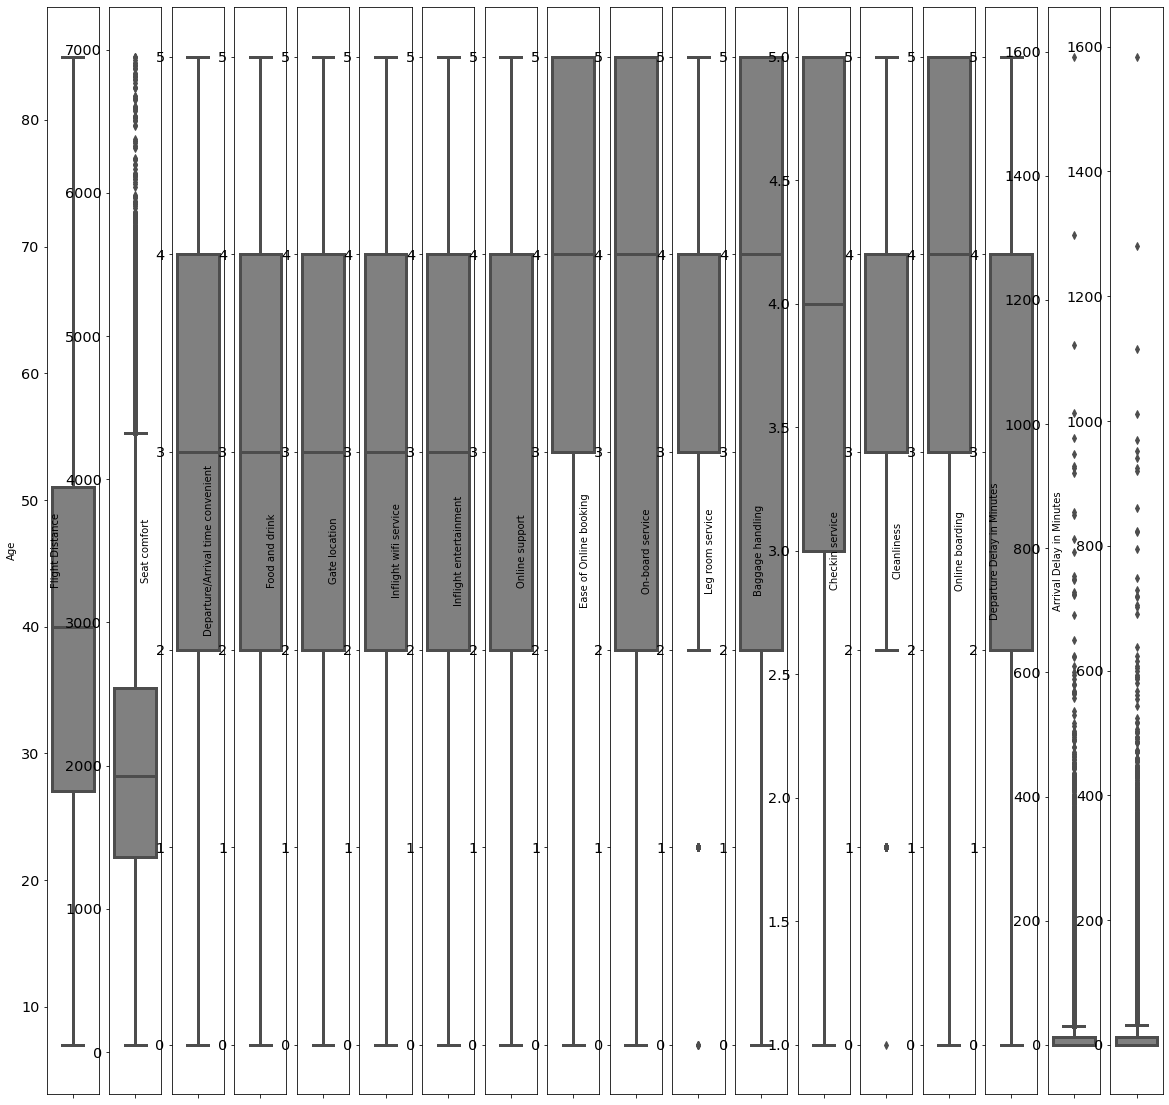

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums),i+1)
  sns.boxplot(y=df[nums[i]], color='gray',orient='v')

In [ ]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outliers:{len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore<3) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outliers:{len(df)}')

Jumlah baris sebelum memfilter outliers:129487
Jumlah baris setelah memfilter outliers:125800


In [ ]:
for cat in cats:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
df.sample()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
99600,satisfied,Male,Loyal Customer,43,Business travel,Business,712,3,3,3,3,2,5,4,4,4,4,4,3,4,4,10,0.0,0,1,1,0,1,0,1,0,0


In [ ]:
df = df.drop(columns=cats).copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125800 entries, 0 to 129875
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       125800 non-null  object 
 1   Age                                125800 non-null  int64  
 2   Flight Distance                    125800 non-null  int64  
 3   Seat comfort                       125800 non-null  int64  
 4   Departure/Arrival time convenient  125800 non-null  int64  
 5   Food and drink                     125800 non-null  int64  
 6   Gate location                      125800 non-null  int64  
 7   Inflight wifi service              125800 non-null  int64  
 8   Inflight entertainment             125800 non-null  int64  
 9   Online support                     125800 non-null  int64  
 10  Ease of Online booking             125800 non-null  int64  
 11  On-board service                   1258

In [ ]:
df['satisfaction'] = df['satisfaction'].replace(['satisfied'], 0)
df['satisfaction'] = df['satisfaction'].replace(['dissatisfied'], 1)

In [ ]:
df.sample(3)

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
57032,0,23,1914,4,0,4,3,4,4,4,4,5,5,5,3,5,4,0,0.0,1,0,0,1,1,0,1,0,0
45827,1,22,1815,2,2,1,4,1,1,1,1,1,1,3,4,3,1,21,18.0,1,0,0,1,1,0,0,1,0
100402,0,33,2223,2,2,2,2,2,2,3,4,4,4,4,3,4,1,4,0.0,1,0,1,0,1,0,1,0,0


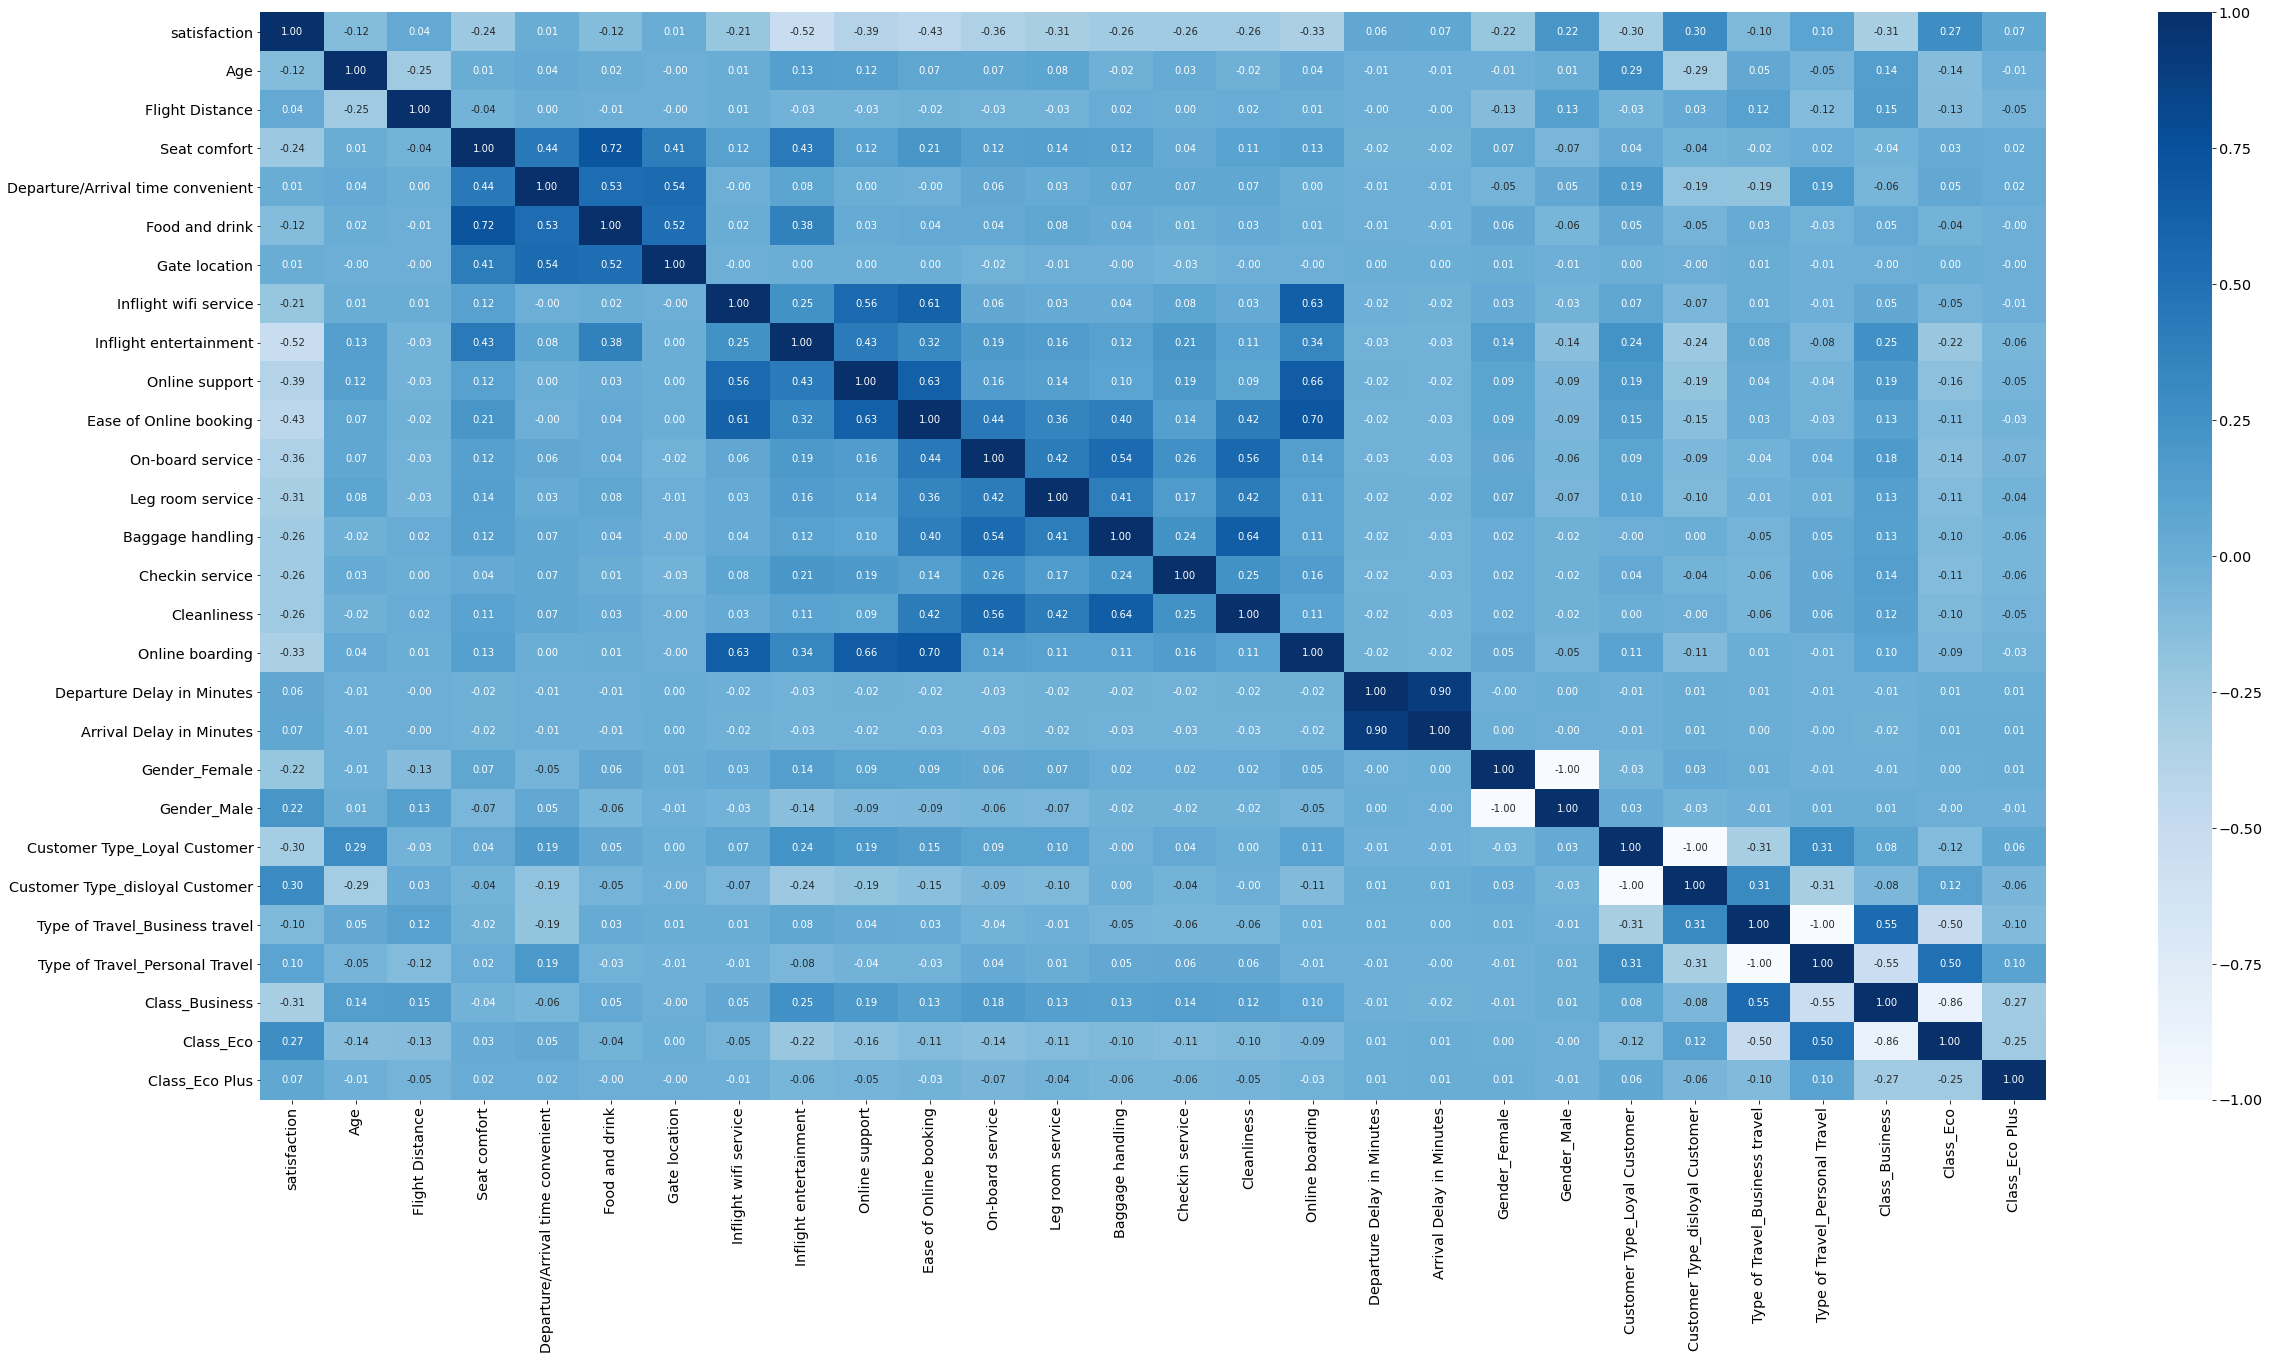

In [ ]:
plt.figure(figsize=(40, 20))
sns.heatmap(df.corr(), cmap='Blues',annot=True, fmt='.2f')

In [ ]:
df.columns

Index(['satisfaction', 'Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')

**Standarisasi** <br>
for linear regression dan knn

In [ ]:
from sklearn.preprocessing import StandardScaler
feats = ['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus']
X = df[feats].values


X_norm = StandardScaler().fit_transform(X)

In [ ]:
new_df = pd.DataFrame(data = X_norm, columns = feats)
new_df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
count,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05,1.258000e+05
mean,-1.321489e-14,-8.326982e-17,-4.161202e-14,-6.865044e-15,-1.174424e-13,-4.206890e-15,1.151581e-13,5.118280e-14,-2.735933e-14,-2.409302e-13,-7.858003e-14,-4.139921e-14,-1.547718e-13,9.958030e-15,1.346145e-14,6.279203e-15,-1.625455e-14,1.329253e-15,8.422517e-15,-8.422517e-15,-1.852467e-13,1.852467e-13,-2.493314e-13,2.493314e-13,-5.198634e-13,-4.554002e-13,2.321195e-15
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.150042e+00,-1.914653e+00,-2.036745e+00,-1.955495e+00,-1.975354e+00,-2.288489e+00,-2.470124e+00,-2.516625e+00,-1.935168e+00,-2.663550e+00,-2.736414e+00,-2.689284e+00,-2.325775e+00,-1.861953e+00,-3.244682e+00,-2.584156e+00,-4.917318e-01,-5.016418e-01,-1.015155e+00,-9.850717e-01,-2.105959e+00,-4.748430e-01,-1.489201e+00,-6.715009e-01,-9.550931e-01,-9.051152e-01,-2.798729e-01
25%,-8.268365e-01,-6.156642e-01,-6.039777e-01,-6.467617e-01,-5.912446e-01,-7.574991e-01,-9.522568e-01,-1.030618e+00,-4.030225e-01,-1.131945e+00,-3.720464e-01,-1.145679e+00,-5.996703e-01,-2.727644e-01,-6.267052e-01,-1.043153e+00,-4.917318e-01,-5.016418e-01,-1.015155e+00,-9.850717e-01,4.748430e-01,-4.748430e-01,-1.489201e+00,-6.715009e-01,-9.550931e-01,-9.051152e-01,-2.798729e-01
50%,3.324739e-02,-4.216382e-02,1.124062e-01,7.604800e-03,1.008100e-01,7.995708e-03,-1.933230e-01,4.553876e-01,3.630503e-01,3.996600e-01,4.160760e-01,3.979262e-01,2.633818e-01,-2.727644e-01,2.459539e-01,4.978492e-01,-4.917318e-01,-5.016418e-01,9.850717e-01,-9.850717e-01,4.748430e-01,-4.748430e-01,6.715009e-01,-6.715009e-01,-9.550931e-01,-9.051152e-01,-2.798729e-01
75%,7.610107e-01,5.749064e-01,8.287901e-01,6.619713e-01,7.928646e-01,7.734905e-01,5.656108e-01,4.553876e-01,1.129123e+00,1.165463e+00,4.160760e-01,1.169729e+00,1.126434e+00,5.218300e-01,1.118613e+00,4.978492e-01,-1.490740e-02,1.630148e-02,9.850717e-01,1.015155e+00,4.748430e-01,-4.748430e-01,6.715009e-01,1.489201e+00,1.047018e+00,1.104832e+00,-2.798729e-01
max,3.010461e+00,3.162751e+00,1.545174e+00,1.316338e+00,1.484919e+00,1.538985e+00,1.324545e+00,1.198391e+00,1.129123e+00,1.165463e+00,1.204198e+00,1.169729e+00,1.126434e+00,1.316424e+00,1.118613e+00,1.268351e+00,5.611621e+00,5.619506e+00,9.850717e-01,1.015155e+00,4.748430e-01,2.105959e+00,6.715009e-01,1.489201e+00,1.047018e+00,1.104832e+00,3.573050e+00


In [ ]:
new_df['satisfaction'] = df['satisfaction'].copy()

In [ ]:
new_df.isna().sum()

Age                                     0
Flight Distance                         0
Seat comfort                            0
Departure/Arrival time convenient       0
Food and drink                          0
Gate location                           0
Inflight wifi service                   0
Inflight entertainment                  0
Online support                          0
Ease of Online booking                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Cleanliness                             0
Online boarding                         0
Departure Delay in Minutes              0
Arrival Delay in Minutes                0
Gender_Female                           0
Gender_Male                             0
Customer Type_Loyal Customer            0
Customer Type_disloyal Customer         0
Type of Travel_Business travel          0
Type of Travel_Personal Travel    

In [ ]:
new_df.dropna(inplace=True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121859 entries, 0 to 125799
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                121859 non-null  float64
 1   Flight Distance                    121859 non-null  float64
 2   Seat comfort                       121859 non-null  float64
 3   Departure/Arrival time convenient  121859 non-null  float64
 4   Food and drink                     121859 non-null  float64
 5   Gate location                      121859 non-null  float64
 6   Inflight wifi service              121859 non-null  float64
 7   Inflight entertainment             121859 non-null  float64
 8   Online support                     121859 non-null  float64
 9   Ease of Online booking             121859 non-null  float64
 10  On-board service                   121859 non-null  float64
 11  Leg room service                   1218

# Modelling

## For DF, RF, Adaboost, XGboost

In [ ]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

## For LR and KNN

In [ ]:
X_ = new_df.drop(columns=['satisfaction'])
y_ = new_df['satisfaction']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size=0.3,random_state=42)

## Logistic Regression S

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

#predict & evaluation
ypredict = lr.predict(X_test)
eval_classification(lr, ypredict, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.67
Recall (Test Set): 0.65
F1-Score (Test Set): 0.66
AUC: 0.69


In [ ]:
print('train score',str(lr.score(X_train,y_train)))
print('test score:',str(lr.score(X_test,y_test)))

train score 0.6903201603732664
test score: 0.6913124350347393


### Hypertuning LR

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
lr = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model_lr = RandomizedSearchCV(lr, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model_lr.fit(X_train, y_train)
ypred = model_lr.predict(X_test)
eval_classification(model_lr, ypred, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailed

Accuracy (Test Set): 0.69
Precision (Test Set): 0.67
Recall (Test Set): 0.65
F1-Score (Test Set): 0.66
AUC: 0.69


In [ ]:
print('train score',str(model_lr.score(X_train,y_train)))
print('test score:',str(model_lr.score(X_test,y_test)))

train score 0.6456943524978357
test score: 0.6511600518195737


## Decission Tree F

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(Xtrain,ytrain)

y_pred = DT.predict(Xtest)
eval_classification(DT, y_pred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.93
Recall (Test Set): 0.93
F1-Score (Test Set): 0.93
AUC: 0.94


In [ ]:
print('Train score: ' + str(DT.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(DT.score(Xtest, ytest))) #accuracy

Train score: 1.0
Test score:0.9361685214626391


### Hypertuning DT

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model_DT = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model_DT.fit(Xtrain, ytrain)

# Predict & Evaluation
y_pred = model_DT.predict(Xtest)#Check performa dari model
eval_classification(model_DT, y_pred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.92
Recall (Test Set): 0.92
F1-Score (Test Set): 0.92
AUC: 0.93


In [ ]:
print('Train score: ' + str(model_DT.score(Xtrain, ytrain)))
print('Test score:' + str(model_DT.score(Xtest, ytest)))

Train score: 0.9278173025799428
Test score:0.9208225005908769


## Random Forest F

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain,ytrain)

y_pred = rf.predict(Xtest)
eval_classification(rf, y_pred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.95
Recall (Test Set): 0.96
F1-Score (Test Set): 0.95
AUC: 0.96


In [ ]:
print('Train score: ' + str(rf.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(rf.score(Xtest, ytest))) #accuracy

Train score: 1.0
Test score:0.9587175410704822


### Hypertuning RF

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
 #List Hyperparameters yang akan diuji
hyperparameters = dict(
                        n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                        bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                        criterion = ['gini','entropy'],
                        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                        min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                        min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                        max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                        n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                       )

 # Init
rf = RandomForestClassifier(random_state=42)
rf_model = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_model.fit(Xtrain,ytrain)

# Predict & Evaluation
ypred = rf_model.predict(Xtest)#Check performa dari model
eval_classification(rf_model, ypred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.95
Recall (Test Set): 0.96
F1-Score (Test Set): 0.95
AUC: 0.96


In [ ]:
print('Train score: ' + str(rf_model.score(Xtrain, ytrain)))
print('Test score:' + str(rf_model.score(Xtest, ytest)))

Train score: 0.9992910853988911
Test score:0.9550933585440794


## Adaboost F

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(Xtrain,ytrain)

y_pred = ab.predict(Xtest)
eval_classification(ab, y_pred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.89
Recall (Test Set): 0.90
F1-Score (Test Set): 0.89
AUC: 0.90


In [ ]:
print('Train score: ' + str(ab.score(Xtrain, ytrain)))
print('Test score:' + str(ab.score(Xtest, ytest)))

Train score: 0.9004655916420622
Test score:0.9019607843137255


### Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
y_pred = ab_tuned.predict(Xtest)#Check performa dari model
eval_classification(ab_tuned, y_pred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.89
Recall (Test Set): 0.90
F1-Score (Test Set): 0.89
AUC: 0.90


In [ ]:
print('Train score: ' + str(ab_tuned.score(Xtrain, ytrain)))
print('Test score:' + str(ab_tuned.score(Xtest, ytest)))

Train score: 0.8982960731194775
Test score:0.8994918458993146


## XG Boost F

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(Xtrain, ytrain)

y_pred = xg.predict(Xtest)
eval_classification(xg, y_pred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.91
Recall (Test Set): 0.92
F1-Score (Test Set): 0.92
AUC: 0.92


In [ ]:
print('Train score: ' + str(xg.score(Xtrain, ytrain)))
print('Test score:' + str(xg.score(Xtest, ytest)))

Train score: 0.9242675448557801
Test score:0.9242713301536831


###  Hypertunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
ypred_ = xg_tuned.predict(Xtest)#Check performa dari model
eval_classification(xg_tuned, ypred_, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.95
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.96


In [ ]:
print('Train score: ' + str(xg_tuned.score(Xtrain, ytrain)))
print('Test score:' + str(xg_tuned.score(Xtest, ytest)))

Train score: 0.9943286831911284
Test score:0.9633065469156228


## K-Neighbor S

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
eval_classification(neigh, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.70
Recall (Test Set): 0.72
F1-Score (Test Set): 0.71
AUC: 0.73


In [ ]:
print('Train score: ' + str(neigh.score(X_train, y_train)))
print('Test score:' + str(neigh.score(X_test, y_test)))

Train score: 0.8551365165707319
Test score:0.7289239017451721


### Hypertunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
knn_model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
eval_classification(knn_model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.70
Recall (Test Set): 0.78
F1-Score (Test Set): 0.74
AUC: 0.75


In [ ]:
print('Train score: ' + str(knn_model.score(X_train, y_train)))
print('Test score:' + str(knn_model.score(X_test, y_test)))

Train score: 0.8080664052553852
Test score:0.7795312684018373


# Feature Importance

Text(0.5, 1.0, 'feature importance score')

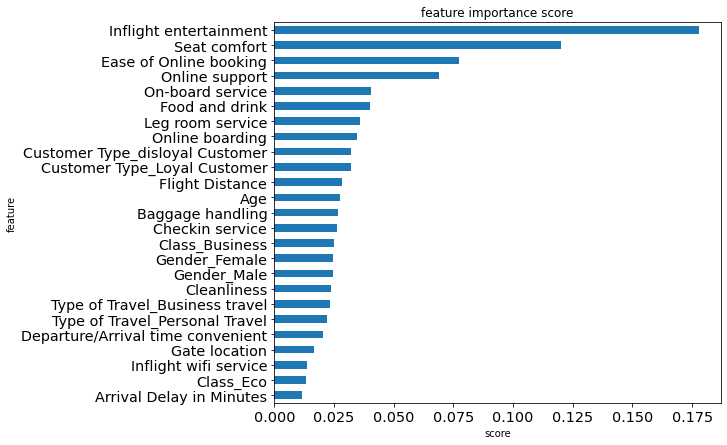

In [ ]:
feat_importances = pd.Series(rf_model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(8, 7))
ax.invert_yaxis()


plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

    
#plt.savefig('feat_importances10.png')

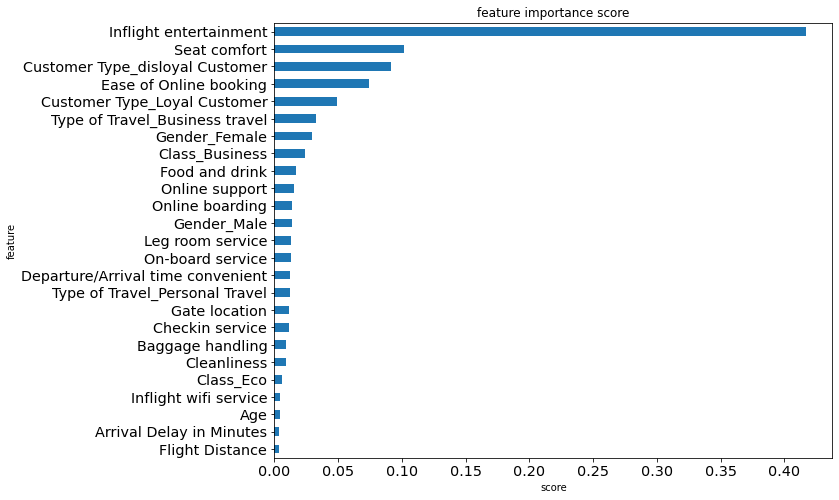

In [ ]:
# plt.figsize(8, 7)
feat_importances1 = pd.Series(xg_tuned.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances1.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

plt.savefig('feat_importances1.png')

In [ ]:
feat_importances1

Age                                  0.004758
Flight Distance                      0.003527
Seat comfort                         0.101868
Departure/Arrival time convenient    0.012366
Food and drink                       0.017299
Gate location                        0.011494
Inflight wifi service                0.004795
Inflight entertainment               0.416740
Online support                       0.015375
Ease of Online booking               0.074356
On-board service                     0.012765
Leg room service                     0.013194
Baggage handling                     0.009126
Checkin service                      0.011269
Cleanliness                          0.008874
Online boarding                      0.013754
Departure Delay in Minutes           0.002907
Arrival Delay in Minutes             0.003724
Gender_Female                        0.029275
Gender_Male                          0.013735
Customer Type_Loyal Customer         0.049119
Customer Type_disloyal Customer   

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred_)

array([[19907,   909],
       [  621, 16303]])

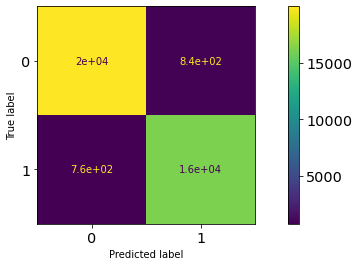

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model,Xtest,ytest)

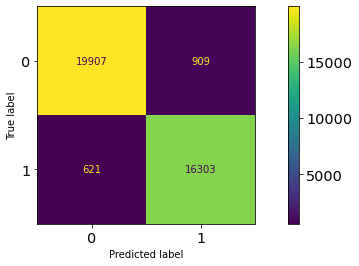

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xg_tuned,Xtest,ytest,values_format='')